In [100]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100, weights=None):
        self.input_size = input_size
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights)
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session

        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * prediction * (1 - prediction) * inputs

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(1/accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))



In [101]:
x = pd.read_csv('./NoLinear/Xnonlinear.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

x

,X,Y
0,0.064775,0.074421
1,0.325578,0.497319
2,0.081736,1.159518
3,0.053192,-0.022444
4,0.504479,0.387099
...,...,...
395,-0.308411,-2.315298
396,-2.690173,1.099032
397,-1.195448,2.093523
398,2.614705,1.642373


In [102]:
y = pd.read_csv('./NoLinear/ynonlinear.csv', header=None)
y = y.drop(y.columns[0], axis=1)
# header column 0 is Class
y.columns = ['Class']

y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
395,-1
396,-1
397,-1
398,-1


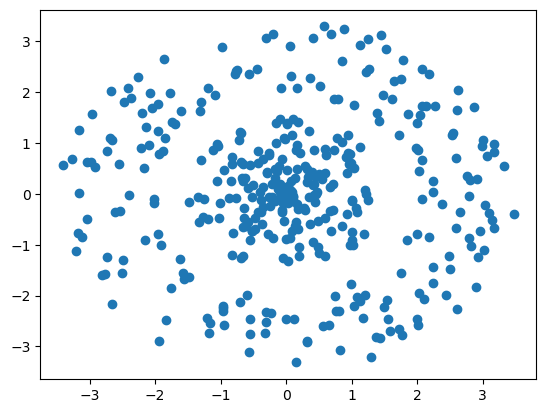

In [103]:
plt.scatter(x['X'], x['Y'])

In [104]:
# Transform the training inputs into a polynomial feature set
poly = PolynomialFeatures(2)
training_inputs = poly.fit_transform(x)
labels = y.values
# Initialize the perceptron with the new input size
perceptron = Perceptron(input_size=training_inputs.shape[1], epochs=100, learning_rate=0.01, weights=np.random.rand(6))
perceptron.train(training_inputs, labels)

Epoch: 0 Accuracy: 124.5
Epoch: 1 Accuracy: 62.0
Epoch: 2 Accuracy: 61.0
Epoch: 3 Accuracy: 64.0
Epoch: 4 Accuracy: 71.5
Epoch: 5 Accuracy: 75.5
Epoch: 6 Accuracy: 78.5
Epoch: 7 Accuracy: 81.0
Epoch: 8 Accuracy: 82.5
Epoch: 9 Accuracy: 84.0
Epoch: 10 Accuracy: 85.0
Epoch: 11 Accuracy: 85.0
Epoch: 12 Accuracy: 85.5
Epoch: 13 Accuracy: 87.0
Epoch: 14 Accuracy: 88.0
Epoch: 15 Accuracy: 88.5
Epoch: 16 Accuracy: 89.5
Epoch: 17 Accuracy: 89.5
Epoch: 18 Accuracy: 91.5
Epoch: 19 Accuracy: 92.5
Epoch: 20 Accuracy: 93.0
Epoch: 21 Accuracy: 93.0
Epoch: 22 Accuracy: 94.0
Epoch: 23 Accuracy: 95.0
Epoch: 24 Accuracy: 95.0
Epoch: 25 Accuracy: 95.5
Epoch: 26 Accuracy: 96.0
Epoch: 27 Accuracy: 96.0
Epoch: 28 Accuracy: 96.5
Epoch: 29 Accuracy: 97.0
Epoch: 30 Accuracy: 97.0
Epoch: 31 Accuracy: 97.0
Epoch: 32 Accuracy: 97.0
Epoch: 33 Accuracy: 97.0
Epoch: 34 Accuracy: 98.0
Epoch: 35 Accuracy: 98.5
Epoch: 36 Accuracy: 98.5
Epoch: 37 Accuracy: 99.0
Epoch: 38 Accuracy: 99.0
Epoch: 39 Accuracy: 99.0
Epoch: 40

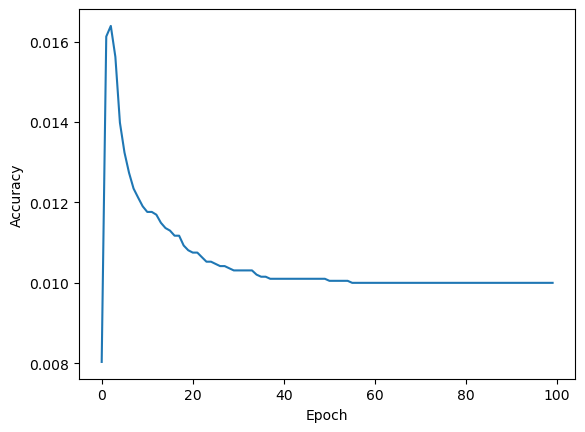

In [105]:
# Plot the accuracy graph
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

/Users/juancisneros/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


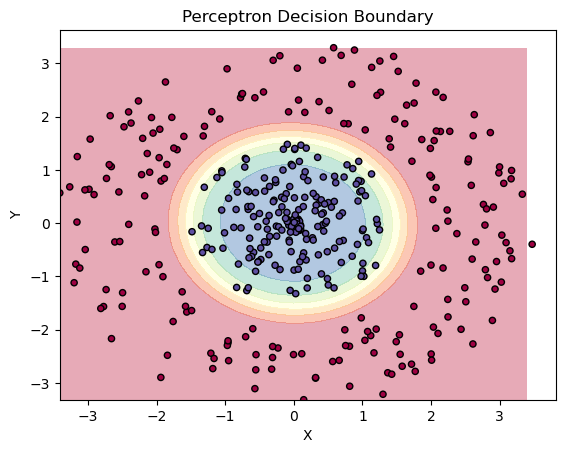

In [106]:
def plot_decision_boundary(perceptron, x, y, poly):
    # Definir la malla de puntos
    x_min, x_max = x['X'].min(), x['X'].max()
    y_min, y_max = x['Y'].min(), x['Y'].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Preparar datos de la malla y transformarlos a polinomial
    grid_data = np.c_[xx.ravel(), yy.ravel()]
    grid_poly = poly.transform(grid_data)

    # Calcular las predicciones en la malla
    Z = perceptron.predict(grid_poly)
    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Spectral)

    # Graficar los puntos de datos
    scatter = plt.scatter(x['X'], x['Y'], c=y['Class'], s=20, edgecolor='k', cmap=plt.cm.Spectral)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Perceptron Decision Boundary')
    plt.show()

# Usar la función para graficar el límite de decisión
plot_decision_boundary(perceptron, x, y, poly)


In [107]:
# Sigmoid function activation function
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights)
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session

        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * prediction * (1 - prediction) * inputs
                self.weights[0] += self.learning_rate * error * prediction * (1 - prediction)

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(1/accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(1/accuracy))


# Plot the decision boundary
def plot_decision_boundary(perceptron, training_inputs, labels):
    if perceptron.weights is None:
        print("Perceptron has not been trained.")
        return

    plt.scatter(training_inputs[:, 0], training_inputs[:, 1], c=labels, cmap=plt.cm.Spectral)

    # Plot the decision boundary
    x_min, x_max = training_inputs[:, 0].min() - 1, training_inputs[:, 0].max() + 1
    y_min, y_max = training_inputs[:, 1].min() - 1, training_inputs[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = np.round(np.array([perceptron.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Decision Boundary')
    plt.show()


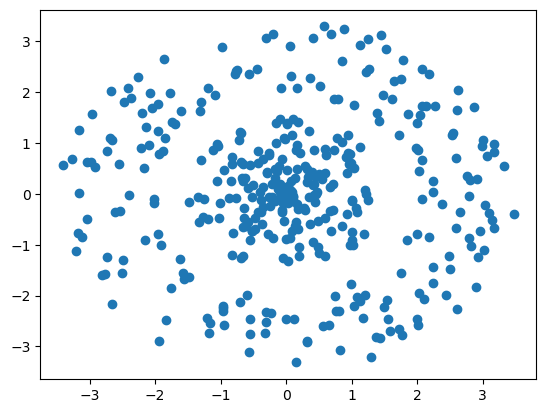

In [108]:
x = pd.read_csv('./NoLinear/Xnonlinear.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

y = pd.read_csv('./NoLinear/ynonlinear.csv', header=None)
y = y.drop(y.columns[0], axis=1)
# header column 0 is Class
y.columns = ['Class']

plt.scatter(x['X'], x['Y'])

In [109]:
poly = PolynomialFeatures(2)

In [110]:
x = poly.fit_transform(x)
y = y.values

In [111]:
x

array([[ 1.00000000e+00,  6.47749318e-02,  7.44205218e-02,
         4.19579179e-03,  4.82058422e-03,  5.53841406e-03],
       [ 1.00000000e+00,  3.25577782e-01,  4.97318535e-01,
         1.06000892e-01,  1.61915866e-01,  2.47325726e-01],
       [ 1.00000000e+00,  8.17364864e-02,  1.15951797e+00,
         6.68085320e-03,  9.47749249e-02,  1.34448193e+00],
       ...,
       [ 1.00000000e+00, -1.19544799e+00,  2.09352308e+00,
         1.42909589e+00, -2.50269794e+00,  4.38283887e+00],
       [ 1.00000000e+00,  2.61470504e+00,  1.64237310e+00,
         6.83668243e+00,  4.29432122e+00,  2.69738941e+00],
       [ 1.00000000e+00,  3.15036448e+00, -5.18888064e-01,
         9.92479633e+00, -1.63468652e+00,  2.69244823e-01]])

In [112]:
perceptron = Perceptron(epochs=100, learning_rate=0.01, weights=np.random.rand(6))
perceptron.train(x, y)

ValueError: operands could not be broadcast together with shapes (5,) (6,) (5,) 

In [ ]:
x = pd.read_csv('./XY/X.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

#to numpy
x = x.values

x


array([[2.82273656e+00, 4.15404756e+00],
       [7.41073948e-01, 3.24473400e-02],
       [4.79497494e+00, 4.04499201e-01],
       [1.67276690e+00, 3.68505650e+00],
       [3.57162611e+00, 1.12629871e+00],
       [4.14629624e+00, 2.51970140e+00],
       [1.50202185e+00, 3.32868653e+00],
       [3.69459525e+00, 4.75555346e+00],
       [4.88221002e+00, 1.30920914e+00],
       [2.14063622e+00, 3.89648667e+00],
       [3.31581264e-01, 2.75550025e+00],
       [4.79506709e+00, 2.40309694e+00],
       [4.16559889e+00, 2.24727911e+00],
       [2.35296973e+00, 4.30715733e+00],
       [1.77825029e+00, 4.54733586e+00],
       [6.63410641e-01, 4.84711533e+00],
       [2.67047873e+00, 4.57528147e+00],
       [3.03378045e+00, 5.31343442e-01],
       [2.10889976e+00, 2.88696582e+00],
       [2.97720694e+00, 4.37506377e+00],
       [3.04721374e+00, 3.50037695e+00],
       [3.83486993e+00, 2.26516712e+00],
       [3.40712682e+00, 4.96972176e+00],
       [4.98823703e+00, 3.19013430e+00],
       [2.021406

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class PerceptronNonLinear:
    def __init__(self,learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights)
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        accuracy = accuracy/100
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session
        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * prediction * (1 - prediction) * inputs

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))


x = pd.read_csv('./NoLinear/Xnonlinear.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

y = pd.read_csv('./NoLinear/ynonlinear.csv', header=None)
y = y.drop(y.columns[0], axis=1)
# header column 0 is Class
y.columns = ['Class']

plt.scatter(x['X'], x['Y'])
poly = PolynomialFeatures(2)
x = poly.fit_transform(x)
y = y.values

perceptron = Perceptron(epochs=100, learning_rate=0.01, weights=np.random.rand(6))
perceptron.train(x, y)

ValueError: non-broadcastable output operand with shape (6,) doesn't match the broadcast shape (32,6)

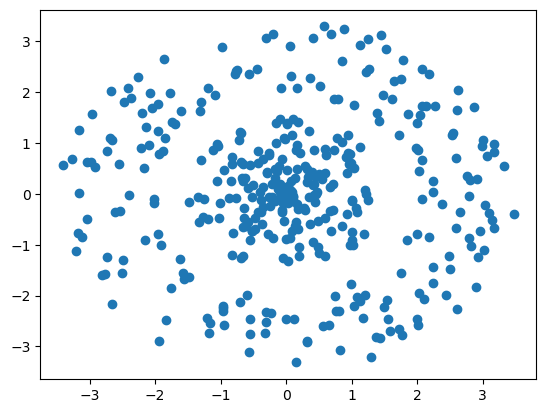

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class PerceptronNonLinear:
    def __init__(self, learning_rate=0.01, epochs=100, weights=None, batch_size=32):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch
        self.batch_size = batch_size

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights)
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        accuracy = accuracy / 100
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session
        num_batches = len(training_inputs) // self.batch_size

        for epoch in range(self.epochs):
            for batch_num in range(num_batches):
                start_idx = batch_num * self.batch_size
                end_idx = (batch_num + 1) * self.batch_size

                batch_inputs = training_inputs[start_idx:end_idx]
                batch_labels = labels[start_idx:end_idx]

                predictions = self.predict(batch_inputs)
                errors = batch_labels - predictions
                self.weights += self.learning_rate * np.dot(errors * predictions * (1 - predictions), batch_inputs)

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))


x = pd.read_csv('./NoLinear/Xnonlinear.csv', header=None)
x = x.drop(x.columns[0], axis=1)
x.columns = ['X', 'Y']

y = pd.read_csv('./NoLinear/ynonlinear.csv', header=None)
y = y.drop(y.columns[0], axis=1)
y.columns = ['Class']

plt.scatter(x['X'], x['Y'])
poly = PolynomialFeatures(2)
x = poly.fit_transform(x)
y = y.values

perceptron = PerceptronNonLinear(epochs=100, learning_rate=0.01, weights=np.random.rand(6), batch_size=32)
perceptron.train(x, y)


ValueError: operands could not be broadcast together with shapes (6,) (6,32) (6,) 

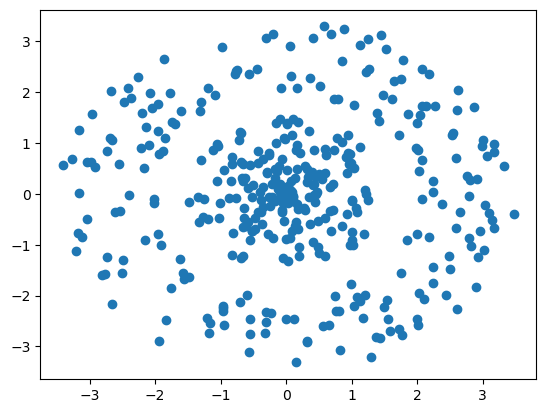

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class PerceptronNonLinear:
    def __init__(self, learning_rate=0.01, epochs=100, weights=None, batch_size=32):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch
        self.batch_size = batch_size

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights)
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        accuracy = accuracy / 100
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session
        num_batches = len(training_inputs) // self.batch_size

        for epoch in range(self.epochs):
            for batch_num in range(num_batches):
                start_idx = batch_num * self.batch_size
                end_idx = (batch_num + 1) * self.batch_size

                batch_inputs = training_inputs[start_idx:end_idx]
                batch_labels = labels[start_idx:end_idx]

                predictions = self.predict(batch_inputs)
                errors = batch_labels - predictions
                self.weights += self.learning_rate * np.dot(batch_inputs.T, errors * predictions * (1 - predictions))

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))


x = pd.read_csv('./NoLinear/Xnonlinear.csv', header=None)
x = x.drop(x.columns[0], axis=1)
x.columns = ['X', 'Y']

y = pd.read_csv('./NoLinear/ynonlinear.csv', header=None)
y = y.drop(y.columns[0], axis=1)
y.columns = ['Class']

plt.scatter(x['X'], x['Y'])
poly = PolynomialFeatures(2)
x = poly.fit_transform(x)
y = y.values

perceptron = PerceptronNonLinear(epochs=100, learning_rate=0.01, weights=np.random.rand(6), batch_size=32)
perceptron.train(x, y)


ValueError: operands could not be broadcast together with shapes (32,32) (6,32) 

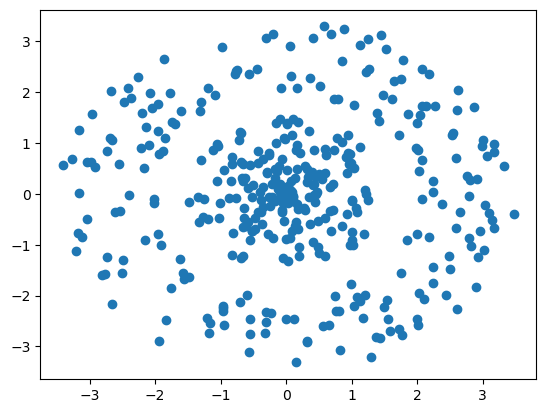

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class PerceptronNonLinear:
    def __init__(self, learning_rate=0.01, epochs=100, weights=None, batch_size=32):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch
        self.batch_size = batch_size

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights)
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        accuracy = accuracy / 100
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session
        num_batches = len(training_inputs) // self.batch_size

        for epoch in range(self.epochs):
            for batch_num in range(num_batches):
                start_idx = batch_num * self.batch_size
                end_idx = (batch_num + 1) * self.batch_size

                batch_inputs = training_inputs[start_idx:end_idx]
                batch_labels = labels[start_idx:end_idx]

                predictions = self.predict(batch_inputs)
                errors = batch_labels - predictions
                mean_gradient = np.mean(errors * predictions * (1 - predictions) * batch_inputs.T, axis=1)
                self.weights += self.learning_rate * mean_gradient

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))


x = pd.read_csv('./NoLinear/Xnonlinear.csv', header=None)
x = x.drop(x.columns[0], axis=1)
x.columns = ['X', 'Y']

y = pd.read_csv('./NoLinear/ynonlinear.csv', header=None)
y = y.drop(y.columns[0], axis=1)
y.columns = ['Class']

plt.scatter(x['X'], x['Y'])
poly = PolynomialFeatures(2)
x = poly.fit_transform(x)
y = y.values

perceptron = PerceptronNonLinear(epochs=100, learning_rate=0.01, weights=np.random.rand(6), batch_size=32)
perceptron.train(x, y)


ValueError: operands could not be broadcast together with shapes (32,32) (6,32) 

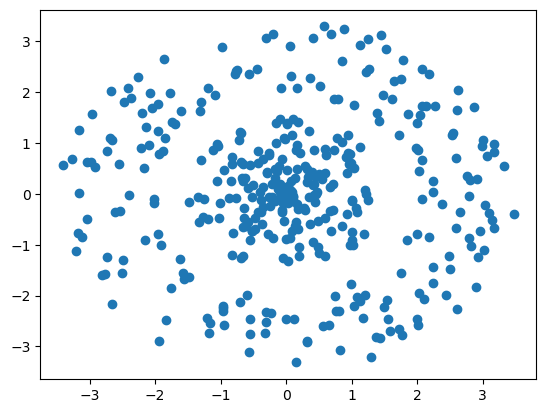

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class PerceptronNonLinear:
    def __init__(self, learning_rate=0.01, epochs=100, weights=None, batch_size=32):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch
        self.batch_size = batch_size

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights)
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        accuracy = accuracy / 100
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session
        num_batches = len(training_inputs) // self.batch_size

        for epoch in range(self.epochs):
            for batch_num in range(num_batches):
                start_idx = batch_num * self.batch_size
                end_idx = (batch_num + 1) * self.batch_size

                batch_inputs = training_inputs[start_idx:end_idx]
                batch_labels = labels[start_idx:end_idx]

                predictions = self.predict(batch_inputs)
                errors = batch_labels - predictions
                mean_gradient = np.mean(errors * predictions * (1 - predictions) * batch_inputs.T, axis=0)
                self.weights += self.learning_rate * mean_gradient

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))


x = pd.read_csv('./NoLinear/Xnonlinear.csv', header=None)
x = x.drop(x.columns[0], axis=1)
x.columns = ['X', 'Y']

y = pd.read_csv('./NoLinear/ynonlinear.csv', header=None)
y = y.drop(y.columns[0], axis=1)
y.columns = ['Class']

plt.scatter(x['X'], x['Y'])
poly = PolynomialFeatures(2)
x = poly.fit_transform(x)
y = y.values

perceptron = PerceptronNonLinear(epochs=100, learning_rate=0.01, weights=np.random.rand(6), batch_size=32)
perceptron.train(x, y)



ValueError: operands could not be broadcast together with shapes (32,32) (32,6) 

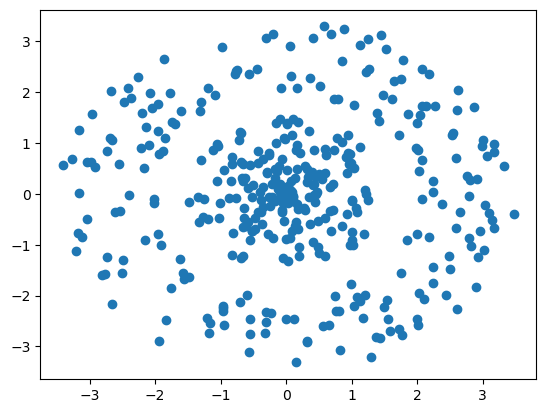

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class PerceptronNonLinear:
    def __init__(self, learning_rate=0.01, epochs=100, weights=None, batch_size=32):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch
        self.batch_size = batch_size

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights)
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        accuracy = accuracy / 100
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session
        num_batches = len(training_inputs) // self.batch_size

        for epoch in range(self.epochs):
            for batch_num in range(num_batches):
                start_idx = batch_num * self.batch_size
                end_idx = (batch_num + 1) * self.batch_size

                batch_inputs = training_inputs[start_idx:end_idx]
                batch_labels = labels[start_idx:end_idx]

                predictions = self.predict(batch_inputs)
                errors = batch_labels - predictions
                mean_gradient = np.mean(errors * predictions * (1 - predictions) * batch_inputs, axis=0)
                self.weights += self.learning_rate * mean_gradient

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))


x = pd.read_csv('./NoLinear/Xnonlinear.csv', header=None)
x = x.drop(x.columns[0], axis=1)
x.columns = ['X', 'Y']

y = pd.read_csv('./NoLinear/ynonlinear.csv', header=None)
y = y.drop(y.columns[0], axis=1)
y.columns = ['Class']

plt.scatter(x['X'], x['Y'])
poly = PolynomialFeatures(2)
x = poly.fit_transform(x)
y = y.values

perceptron = PerceptronNonLinear(epochs=100, learning_rate=0.01, weights=np.random.rand(6), batch_size=32)
perceptron.train(x, y)


In [7]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class PerceptronNonLinearBatch:
    def __init__(self, learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights)
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = np.round([self.predict(inputs) for inputs in training_inputs])
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        accuracy = accuracy * 100
        return accuracy

    def train(self, training_inputs, labels):
        for epoch in range(self.epochs):
            predictions = [self.predict(inputs) for inputs in training_inputs]
            errors = labels - predictions
            gradients = np.dot(errors * predictions * (1 - predictions), training_inputs)

            # Update weights after processing the entire dataset
            self.weights += self.learning_rate * gradients / len(training_inputs)

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(accuracy))

# Your data
x = np.random.rand(100, 5)
y = np.random.randint(0, 2, size=(100,))

# Transform the data
poly = PolynomialFeatures(2)
training_inputs = poly.fit_transform(x)

# Instantiate and train the perceptron
perceptron = PerceptronNonLinearBatch(epochs=100, learning_rate=0.01, weights=np.random.rand(6))
perceptron.train(training_inputs, y)

# Plot accuracy
plt.plot(perceptron.accuracies[1:])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


ValueError: shapes (21,) and (6,) not aligned: 21 (dim 0) != 6 (dim 0)